# Факторный анализ в Python

## Загрузка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats as ss
from math import  sin, cos, pi 
from statsmodels.formula.api import ols
from scipy.stats import chi2
from numpy import arange

In [2]:
features = ["X1", "X2", "X3", "X4", "X5", "X6", "X7","X8","X9"]
f_len = len (features)
unclr_data = pd.read_excel ('lab2_data.xlsx')
unclr_data = unclr_data[features]

unclr_data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9
0,-0.358860,1.046662,-0.024135,-0.925109,1.108921,-0.419513,0.043384,-0.222082,0.089137
1,0.732542,0.152726,1.493990,0.505787,-0.675489,-0.282279,0.282664,-0.269168,-0.647999
2,1.213320,0.431885,0.657885,-0.079579,-0.394043,-0.191350,-0.072765,0.280705,0.014490
3,-0.404481,0.220163,-0.531442,-0.014539,-0.572209,-0.460731,-0.228032,-0.575047,0.574341
4,-0.014946,0.934528,0.457704,0.115543,1.480501,-0.356004,-0.121853,-0.337658,0.210438


#### X78 – ПРОДАЖА АЛКОГОЛЬНОЙ ПРОДУКЦИИ НАСЕЛЕНИЮ (Пиво и пивные напитки) (тысяч декалитров)
#### X63 – СМЕРТНОСТЬ НАСЕЛЕНИЯ В ТРУДОСПОСОБНОМ ВОЗРАСТЕ
#### X44 – ЧИСЛО ЗАРЕГИСТРИРОВАННЫХ ПРЕСТУПЛЕНИЙ, СОВЕРШЕННЫХ в 2018 г. (Убийство и покушение на убийство)
#### X45 – ОЖИДАЕМАЯ ПРОДОЛЖИТЕЛЬНОСТЬ ЖИЗНИ ПРИ РОЖДЕНИИ (число лет)
#### X41 – СРЕДНЕ-ДУШЕВЫЕ ДЕНЕЖНЫЕ ДОХОДЫ (В МЕСЯЦ), РУБ. 
#### X40 – ЧИСЛО ЗАРЕГИСТРИРОВАННЫХ ГРАБЕЖЕЙ, СОВЕРШЕННЫХ в 2018 г. (на 1000 человек)
#### X31 – УРОВЕНЬ БЕЗРАБОТИЦЫ

## Удаляем строки с пустыми значениями и стандартизируем данные

In [3]:
unsc_data = unclr_data[unclr_data!='-'].dropna().astype('float64')
index = unsc_data.index 
columns = unsc_data.columns 
index = unsc_data.index
columns = unsc_data.columns
scaled = (unsc_data - unsc_data.mean(axis=0))/unsc_data.std()
data = pd.DataFrame(scaled, columns=columns, index=index) 

data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9
0,-0.358860,1.046662,-0.024135,-0.925109,1.108921,-0.419513,0.043384,-0.222082,0.089137
1,0.732542,0.152726,1.493990,0.505787,-0.675489,-0.282279,0.282664,-0.269168,-0.647999
2,1.213320,0.431885,0.657885,-0.079579,-0.394043,-0.191350,-0.072765,0.280705,0.014490
3,-0.404481,0.220163,-0.531442,-0.014539,-0.572209,-0.460731,-0.228032,-0.575047,0.574341
4,-0.014946,0.934528,0.457704,0.115543,1.480501,-0.356004,-0.121853,-0.337658,0.210438


## Корреляционная матрица

In [4]:
correlations = data.corr()

correlations

,X1,X2,X3,X4,X5,X6,X7,X8,X9
X1,1.000000,0.424649,0.231616,-0.162421,0.255123,-0.179811,0.325123,-0.275671,-0.025242
X2,0.424649,1.000000,0.594993,0.021442,0.381429,0.196778,0.612704,0.061868,-0.236869
X3,0.231616,0.594993,1.000000,0.004660,0.140411,0.371633,0.472637,0.483304,-0.343512
X4,-0.162421,0.021442,0.004660,1.000000,-0.127318,-0.131076,0.058640,-0.107069,-0.057333
X5,0.255123,0.381429,0.140411,-0.127318,1.000000,0.165129,0.289761,-0.011878,-0.018994
X6,-0.179811,0.196778,0.371633,-0.131076,0.165129,1.000000,0.452447,0.750230,-0.322548
X7,0.325123,0.612704,0.472637,0.058640,0.289761,0.452447,1.000000,0.138288,-0.360360
X8,-0.275671,0.061868,0.483304,-0.107069,-0.011878,0.750230,0.138288,1.000000,-0.185402
X9,-0.025242,-0.236869,-0.343512,-0.057333,-0.018994,-0.322548,-0.360360,-0.185402,1.000000


## Проверим гипотезу о незначимости корреляционной матрицы с использованием критерия Уилкса

In [5]:
def chi_2(n,k,R):
    return -(n-1/6*(2*k+5))*math.log(np.linalg.det(R), math.e)

chi_2_crt=chi_2(data.shape[0],data.shape[1],correlations)
print('Наблюдаемое значение составило',chi_2_crt)
p_value=chi2.sf(chi_2_crt, data.shape[1]*(data.shape[1]-1)/2)
print ('Значение p-value равно {}'.format(p_value))
if p_value>0.05:
    print('Принимаем гипотезу, матрица парных коэффициентов корреляции незначима')
else:
    print('Отвергаем гипотезу, матрица парных коэффициентов корреляции значима')

Наблюдаемое значение составило 290.24235863610625
Значение p-value равно 1.6853718731989932e-41
Отвергаем гипотезу, матрица парных коэффициентов корреляции значима


## Оценка общности признаков
### Общность- доля дисперсии признака, объясняемая общими факторами
### Для i-ого признака: квадрат оценки множественного коеффициента детерминации уравнения регрессии i-ого признака на все остальные 

In [6]:
communalities=[]
for variable in features:
    communalities.append(ols(formula="{} ~ {}".format(variable, ' + '.join(set(features)-set([variable]))), data=data).fit().rsquared)

pd.DataFrame(communalities,index = features,columns = ['Communalities'])

,Communalities
X1,0.388837
X2,0.590637
X3,0.627354
X4,0.129942
X5,0.216776
X6,0.746782
X7,0.604932
X8,0.746572
X9,0.219266


## Расчет редуцированной матрицы
### Редуцированная матрица=корреляционная матрица с оценками общностей признака на диагонали

In [7]:
Rh_eval = np.empty((f_len,f_len)) 
for i in range(f_len):
    for j in range(f_len):
        if i==j:
            Rh_eval[i][j] = communalities[i]
        else:
            Rh_eval[i][j] = correlations.values [i][j]
pd.DataFrame(Rh_eval, index=features, columns=features)

,X1,X2,X3,X4,X5,X6,X7,X8,X9
X1,0.388837,0.424649,0.231616,-0.162421,0.255123,-0.179811,0.325123,-0.275671,-0.025242
X2,0.424649,0.590637,0.594993,0.021442,0.381429,0.196778,0.612704,0.061868,-0.236869
X3,0.231616,0.594993,0.627354,0.004660,0.140411,0.371633,0.472637,0.483304,-0.343512
X4,-0.162421,0.021442,0.004660,0.129942,-0.127318,-0.131076,0.058640,-0.107069,-0.057333
X5,0.255123,0.381429,0.140411,-0.127318,0.216776,0.165129,0.289761,-0.011878,-0.018994
X6,-0.179811,0.196778,0.371633,-0.131076,0.165129,0.746782,0.452447,0.750230,-0.322548
X7,0.325123,0.612704,0.472637,0.058640,0.289761,0.452447,0.604932,0.138288,-0.360360
X8,-0.275671,0.061868,0.483304,-0.107069,-0.011878,0.750230,0.138288,0.746572,-0.185402
X9,-0.025242,-0.236869,-0.343512,-0.057333,-0.018994,-0.322548,-0.360360,-0.185402,0.219266


## Расчет собственных чисел и соответствующих им собственных векторов редуцированной матрицы

### Собственные значения- дисперсия выделенных факторов

In [8]:
uns_eigenvalues_Rh_eval, eigenveсtors_Rh_eval=np.linalg.eig(Rh_eval)
couple_lst=[]

for i in range(len(uns_eigenvalues_Rh_eval)):
    couple_lst.append((uns_eigenvalues_Rh_eval[i], eigenveсtors_Rh_eval[:,i]))

from operator import itemgetter

couple_lst = sorted(couple_lst, key = itemgetter(0),reverse=True)
eigenvalues_Rh_eval=sorted(uns_eigenvalues_Rh_eval,reverse=True)

couple_lst

[(2.634186003270114,
  array([-0.14175673, -0.41333269, -0.46107286,  0.0349132 , -0.19145487,
         -0.42457032, -0.44463977, -0.33826628,  0.25731397])),
 (1.4515418479984983,
  array([-0.49666551, -0.37826882, -0.03623457, -0.02107723, -0.22106   ,
          0.43139493, -0.22338805,  0.56774769, -0.03563852])),
 (0.41017410069850263,
  array([ 0.27488604, -0.0542174 , -0.26533368, -0.642598  ,  0.45888561,
          0.25167743, -0.13279736,  0.12153819,  0.36309748])),
 (0.30595049560800314,
  array([ 0.2018245 ,  0.10933131,  0.58363844, -0.1671119 , -0.17109851,
         -0.40526498, -0.47202443,  0.34871856,  0.20205748])),
 (0.07443708081715603,
  array([ 0.40152455, -0.39113342,  0.04473596, -0.44278214, -0.43791111,
          0.05037583,  0.09230656, -0.1279205 , -0.51821553])),
 (-0.059556740593882766,
  array([-0.30540642,  0.17358168,  0.07219932, -0.1646804 ,  0.41481731,
         -0.0125922 , -0.50419277, -0.21850969, -0.60833802])),
 (-0.16009456426668073,
  array([-0

## Сравнение суммарной общности с суммой собственных чисел редуцированной матрицы для поиска количества факторов, до которого можно снизить размерность признакового пространства. 

In [9]:
#np.trace- сумма диагональных элементов матрицы
print('Суммарная общность: ', np.trace(Rh_eval))
print('Сумма оценок первого собственного числа редуцированной матрицы:', eigenvalues_Rh_eval[0])
if np.trace(Rh_eval) < eigenvalues_Rh_eval[0]:
    print('Размерность признакового пространства можно снизить до одного общего фактора.')
else:
    print('До одного фактора снизить нельзя')

Суммарная общность:  4.271098416835585
Сумма оценок первого собственного числа редуцированной матрицы: 2.634186003270114
До одного фактора снизить нельзя


In [10]:
print('Суммарная общность: ', np.trace(Rh_eval))
print('Сумма оценок первых двух собственных чисел редуцированной матрицы:', eigenvalues_Rh_eval[0]+eigenvalues_Rh_eval[1])
if np.trace(Rh_eval) < eigenvalues_Rh_eval[0]+eigenvalues_Rh_eval[1]:
    print('Размерность признакового пространства можно снизить до двух общих факторов.')
else:
    print('До двух факторов снизить нельзя')

Суммарная общность:  4.271098416835585
Сумма оценок первых двух собственных чисел редуцированной матрицы: 4.085727851268612
До двух факторов снизить нельзя


In [11]:
print('Суммарная общность: ', np.trace(Rh_eval))
print('Сумма оценок первых трех собственных чисел редуцированной матрицы:', eigenvalues_Rh_eval[0]+eigenvalues_Rh_eval[1]+eigenvalues_Rh_eval[2])
if np.trace(Rh_eval) < eigenvalues_Rh_eval[0]+eigenvalues_Rh_eval[1]+eigenvalues_Rh_eval[2]:
    print('Размерность признакового пространства можно снизить до трех общих факторов.')
else:
    print('До трех факторов снизить нельзя')

Суммарная общность:  4.271098416835585
Сумма оценок первых трех собственных чисел редуцированной матрицы: 4.495901951967115
Размерность признакового пространства можно снизить до трех общих факторов.


## Критерий каменистой осыпи

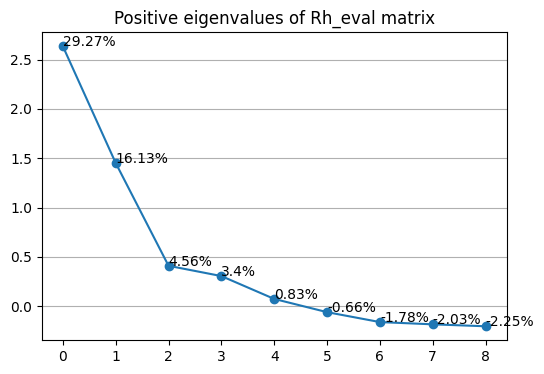

In [12]:
dft = pd.DataFrame([])
eigenvalues_pos=[]
for i in range (len(eigenvalues_Rh_eval)):
    if eigenvalues_Rh_eval[i] >= -5:
        eigenvalues_pos.append(eigenvalues_Rh_eval[i])
dft['y'] = eigenvalues_pos
dft['x'] = list (range(len(eigenvalues_pos)))
dft['Tot_var'] = (dft['y']/f_len).apply(lambda x: round(x *100, 2)).apply(str) +'%'

plt.figure(figsize=(6,4))
plt.plot(dft['x'], dft['y'], marker='o')
ax = plt.gca()
dft.apply(lambda x: ax.annotate(x['Tot_var'], (x['x'], x['y'])), axis=1)
plt.title('Positive eigenvalues of Rh_eval matrix')
plt.grid(axis='y')
plt.show()

## Критерий Кайзера

In [13]:
print('Критерий Кайзера предлагает {} фактор(-а/ов).'.format(len(uns_eigenvalues_Rh_eval[uns_eigenvalues_Rh_eval >1])))

Критерий Кайзера предлагает 2 фактор(-а/ов).


## Берем три фактора

In [21]:
fact = 3

U = np.empty ((fact,f_len)) 
for i in range(fact):
    U[i]=couple_lst[i][1]

df_U=pd.DataFrame(data=U, index=['Factor_'+str(i +1) for i in range(fact)], columns=features)

df_U

,X1,X2,X3,X4,X5,X6,X7,X8,X9
Factor_1,-0.141757,-0.413333,-0.461073,0.034913,-0.191455,-0.424570,-0.444640,-0.338266,0.257314
Factor_2,-0.496666,-0.378269,-0.036235,-0.021077,-0.221060,0.431395,-0.223388,0.567748,-0.035639
Factor_3,0.274886,-0.054217,-0.265334,-0.642598,0.458886,0.251677,-0.132797,0.121538,0.363097


In [22]:
sqrt_l=np.eye(fact)
for i in range(fact):
    sqrt_l[i][i]=math.sqrt(eigenvalues_Rh_eval[i])  
A=np.dot(U.T,sqrt_l)
df_A = pd.DataFrame(data=A, columns=['Factor_'+str(i + 1) for i in range(fact)], index=features)

df_A

,Factor_1,Factor_2,Factor_3
X1,-0.230074,-0.598382,0.176050
X2,-0.670846,-0.455738,-0.034723
X3,-0.748329,-0.043655,-0.169933
X4,0.056665,-0.025394,-0.411551
X5,-0.310735,-0.266333,0.293893
X6,-0.689085,0.519744,0.161186
X7,-0.721658,-0.269138,-0.085050
X8,-0.549012,0.684022,0.077839
X9,0.417625,-0.042937,0.232545


In [23]:
#Важно отметить, что матрица, рассчитанная таким способом может не совпасть с аналогичной, полученной с помощью других программных пакетов. Это связано с тем, что собственные вектора матрицы R_h берутся с точностью до знака. Для того, чтобы скорректировать полученные результаты, можно воспользоваться следующим кодом
df_A['Factor_1'] *= -1# если не совпал первый столбец
df_A['Factor_2'] *= -1# если не совпал второй столбец
df_A['Factor_3'] *= -1# если не совпал третий столбец

In [24]:
df_A

,Factor_1,Factor_2,Factor_3
X1,0.230074,0.598382,-0.176050
X2,0.670846,0.455738,0.034723
X3,0.748329,0.043655,0.169933
X4,-0.056665,0.025394,0.411551
X5,0.310735,0.266333,-0.293893
X6,0.689085,-0.519744,-0.161186
X7,0.721658,0.269138,0.085050
X8,0.549012,-0.684022,-0.077839
X9,-0.417625,0.042937,-0.232545


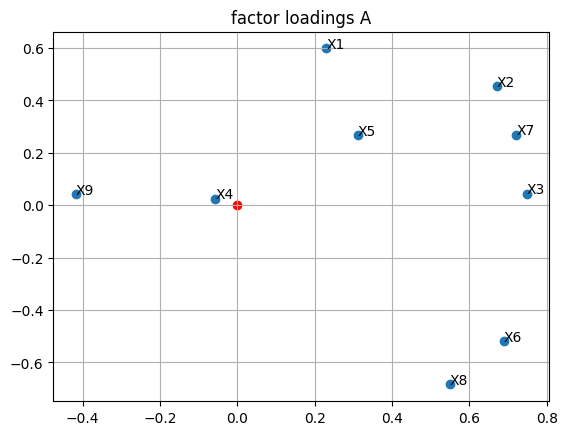

In [25]:
plt.scatter(df_A['Factor_1'], df_A['Factor_2'])
plt.scatter (0, 0, c = 'r')
plt.grid()
plt.title ('factor loadings A')
for variable in features :
    plt.annotate('{}'.format(variable), xy = (df_A['Factor_1'][variable],df_A['Factor_2'][variable]))

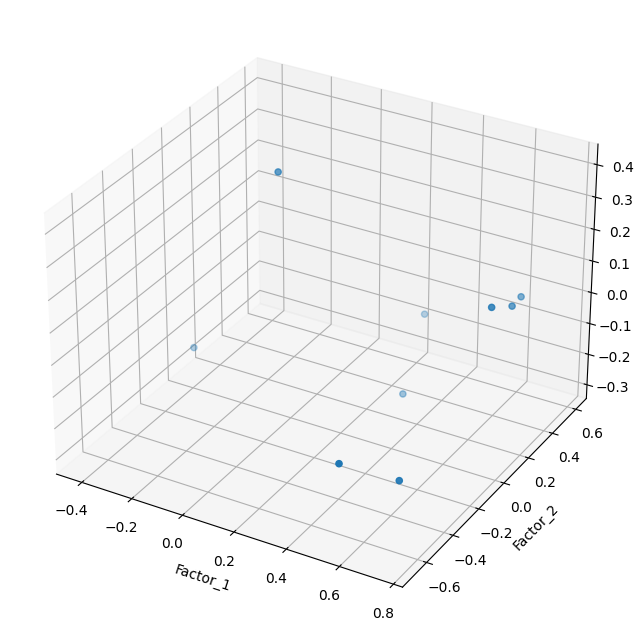

In [26]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')
ax.scatter(df_A['Factor_1'], df_A['Factor_2'], df_A['Factor_3'])

ax.set_xlabel('Factor_1')
ax.set_ylabel('Factor_2')

plt.show()

## Функции квартимакс и варимакс для расчета критериев q и v при вращении факторных осей

In [27]:
def quartimax (X): 
    value = 0
    m = X.shape[1]
    for row in X:
        value += (sum (row**4) - (sum(row**2))**2)/m**2
    return value

def varimax (X) :
    value = 0
    k = X.shape[0]
    for row in X.T:
        value += (k*sum(row**4) -sum(row**2)**2)/k**2
    return value

def criteria (method,X):
    if method == 'varimax':
        return varimax(X)
    elif method == 'quartimax':
        return quartimax (X)
    else:
        print ('wrong input')

## Вращение в случае двух факторов

In [28]:
rad_column = []
grad_column=[]

criteria_column = []
dict_for_B = {}

for alpha in arange(0, pi/2, 0.0001):

    rad_column.append(alpha)
    grad_column.append(alpha*180/pi)

    grad = alpha
    T = [[cos(grad),sin(grad)],
         [-sin(grad),cos(grad)]]
    B = np.dot (A,T)
    dict_for_B[criteria('quartimax',B)] = B
    criteria_column.append (criteria('quartimax',B))

df_rotation = pd.DataFrame([]) 
df_rotation['rad'] = rad_column
df_rotation['grad'] = grad_column
df_rotation ['criteria'] = criteria_column

ValueError: shapes (9,3) and (2,2) not aligned: 3 (dim 1) != 2 (dim 0)

## Для трех факторов (выполняется около 10 минут), используем квартимакс в качестве критерия

In [ ]:
import tqdm
radx_column = []
gradx_column=[]
rady_column = []
grady_column=[]
radz_column = []
gradz_column=[]

criteria_column = []
dict_for_B = {}

for alpha in arange(0, pi/2, 0.01):
    print(alpha)
    for alpha2 in arange(0, pi/2, 0.01):
        for alpha3 in arange(0, pi/2, 0.01):
            radx_column.append(alpha)
            gradx_column.append(alpha*180/pi)
            rady_column.append(alpha2)
            grady_column.append(alpha2*180/pi)
            radz_column.append(alpha3)
            gradz_column.append(alpha3*180/pi)            
            
            grad = alpha
            grad2 = alpha2
            grad3 = alpha3
            T = [[1, 0, 0],
                 [0, cos(grad), -sin(grad)],
                 [0, sin(grad), cos(grad)]]
            T2 = [[cos(grad2), 0, sin(grad2)],
                 [0, 1, 0],
                 [-sin(grad2), 0, cos(grad2)]]
            T3 = [[cos(grad3), -sin(grad3), 0],
                 [sin(grad3), cos(grad3), 0],
                 [0, 0, 1]]
            B = np.dot(np.dot(np.dot (A,T), T2), T3)
            dict_for_B[criteria('quartimax',B)] = B
            criteria_column.append (criteria('quartimax',B))

df_rotation = pd.DataFrame([]) 
df_rotation['radx'] = radx_column
df_rotation['gradx'] = gradx_column
df_rotation['rady'] = rady_column
df_rotation['grady'] = grady_column
df_rotation['radz'] = radz_column
df_rotation['gradz'] = gradz_column
df_rotation ['criteria'] = criteria_column
df_rotation

0.0


In [ ]:
criteria_best = df_rotation ['criteria'].max()

criteria_best

-0.037847743041575975

## Вывод лучшего угла вращения для трех факторов

In [ ]:
radx_best = df_rotation.loc[df_rotation['criteria'].idxmax(),'radx']
gradx_best = df_rotation.loc [df_rotation['criteria'].idxmax(),'gradx']
rady_best = df_rotation.loc[df_rotation['criteria'].idxmax(),'rady']
grady_best = df_rotation.loc [df_rotation['criteria'].idxmax(),'grady']
radz_best = df_rotation.loc[df_rotation['criteria'].idxmax(),'radz']
gradz_best = df_rotation.loc [df_rotation['criteria'].idxmax(),'gradz']

print ('Лучший угол для вращения x:{:.3f} y:{:.3f} z:{:.3f} радиан или x:{:.3f} y:{:.3f} z:{:.3f} градусов'.format (radx_best, gradx_best, rady_best, grady_best, radz_best, gradz_best))

Лучший угол для вращения x:1.370 y:78.495 z:0.240 радиан или x:13.751 y:0.080 z:4.584 градусов


## Вывод лучшего угла вращения для двух факторов (оставил для проверки)

In [ ]:
rad_best = df_rotation.loc[df_rotation['criteria'].idxmax(),'rad']
grad_best = df_rotation.loc [df_rotation['criteria'].idxmax(),'grad']

print ('Лучший угол для вращения :{:.3f} радиан или {:.3f} градусов'.format (rad_best,grad_best))

Лучший угол для вращения :1.388 радиан или 79.527 градусов


## Матрица факторного отображения после вращения

In [ ]:
B = dict_for_B [criteria_best]
df_B = pd.DataFrame(data=B, columns=['Factor_'+str(i +1) for i in range(fact)], index=features)

df_B

,Factor_1,Factor_2,Factor_3
x78,0.137919,-0.151692,0.909569
x63,0.931812,0.005975,-0.238944
х44,0.249825,0.131023,0.857906
x45,-0.923806,-0.049695,0.279028
x41,0.182290,-0.394038,0.158561
x40,0.569689,0.373711,0.008500
x31,-0.409259,0.499336,-0.261201


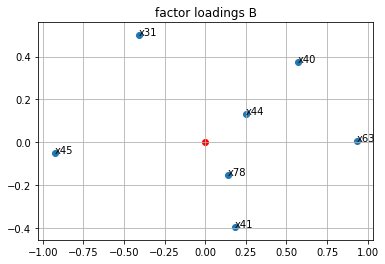

In [ ]:
plt.scatter(df_B['Factor_1'],df_B['Factor_2'])
plt.scatter (0,0,c= 'r')
plt.grid()
plt.title ('factor loadings B')
for variable in features :
    plt.annotate('{}'.format(variable),xy = (df_B['Factor_1'][variable],df_B['Factor_2'][variable]))

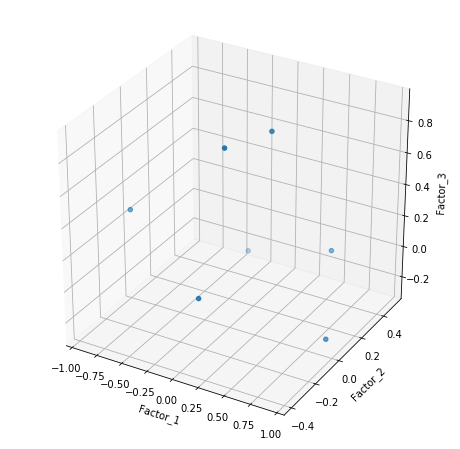

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')
ax.scatter(df_B['Factor_1'], df_B['Factor_2'], df_B['Factor_3'])

ax.set_xlabel('Factor_1')
ax.set_ylabel('Factor_2')
ax.set_zlabel('Factor_3')

plt.show()

In [ ]:
B = A

## Оценка редуцированной матрицы парных коэффициентов корреляции

In [ ]:
Rh_real = np.dot(B,B.T)

pd.DataFrame(Rh_real,index = features,columns = features)

,x78,x63,х44,x45,x41,x40,x31
x78,0.869348,-0.089728,0.794905,0.133923,0.229135,0.029614,-0.369771
x63,-0.089728,0.925404,0.028581,-0.927783,0.129619,0.531045,-0.315956
х44,0.794905,0.028581,0.815582,0.002079,0.129943,0.198580,-0.260905
x45,0.133923,-0.927783,0.002079,0.933743,-0.104576,-0.542482,0.280378
x41,0.229135,0.129619,0.129943,-0.104576,0.213637,-0.042060,-0.312777
x40,0.029614,0.531045,0.198580,-0.542482,-0.042060,0.464278,-0.048763
x31,-0.369771,-0.315956,-0.260905,0.280378,-0.312777,-0.048763,0.485055


## Оценка остаточной матрицы парных коэффициентов корреляции

In [ ]:
D2 = correlations.values - Rh_real

pd.DataFrame(D2,index = features,columns = features)

,x78,x63,х44,x45,x41,x40,x31
x78,0.130652,-0.002426,0.048147,0.018708,0.006026,0.005475,-0.028652
x63,-0.002426,0.074596,-0.006187,-0.013882,-0.016165,0.016751,-0.025429
х44,0.048147,-0.006187,0.184418,-0.007480,-0.011020,0.014828,0.006366
x45,0.018708,-0.013882,-0.007480,0.066257,-0.007947,-0.019596,0.012960
x41,0.006026,-0.016165,-0.011020,-0.007947,0.786363,0.004618,-0.040205
x40,0.005475,0.016751,0.014828,-0.019596,0.004618,0.535722,0.032854
x31,-0.028652,-0.025429,0.006366,0.012960,-0.040205,0.032854,0.514945


## Оценки характерностей

In [ ]:
charact =[]
for i in range(D2.shape[0]):
    charact.append (math.sqrt(D2[i][i]))
    
charact

[0.3614580381917531,
 0.2731223057998999,
 0.42943968463375387,
 0.2574040993038729,
 0.8867711617391063,
 0.731930658599499,
 0.7175966046202393]

## Связь исходных признаков с главными факторами

In [ ]:
for i in range(0,f_len):
    print('{} = {:.3f}*F{} + {:.3f}*F{} + {:.3f}*F{} + {:.3f}*D{}'.format(features[i], B[i,0], 1, B[i,1], 2, B[i, 2], 3, charact[i], i+1))

x78 = 0.015*F1 + 0.922*F2 + 0.139*F3 + 0.361*D1
x63 = -0.037*F1 + -0.237*F2 + 0.932*F3 + 0.273*D2
х44 = 0.283*F1 + 0.820*F2 + 0.250*F3 + 0.429*D3
x45 = 0.001*F1 + 0.284*F2 + -0.924*F3 + 0.257*D4
x41 = -0.359*F1 + 0.227*F2 + 0.182*F3 + 0.887*D5
x40 = 0.369*F1 + -0.059*F2 + 0.570*F3 + 0.732*D6
x31 = 0.444*F1 + -0.347*F2 + -0.410*F3 + 0.718*D7


## Индивидуальные значения главных факторов, полученные методом Бартлетта

In [ ]:
scr_charact = np.eye(f_len)
for i in range(f_len):
    scr_charact[i][i] = D2[i][i]

Q = np.linalg.inv(np.dot(np.dot(B.T, np.linalg.inv(scr_charact)), B))
W = np.dot(np.dot(B.T,np.linalg.inv(scr_charact)),data.values.T)
F = np.dot(Q, W)
df_factor_scores_lect = pd.DataFrame (data =F.T,index = index, columns = ['Factor1_lect','Factor2_lect', 'Factor3_lect'] )
                  
df_factor_scores_lect

,Factor1_lect,Factor2_lect,Factor3_lect
0,-1.305878,0.109494,-0.723337
1,-1.141965,-0.465299,0.218534
2,-0.036973,-0.297371,0.485797
3,-0.888215,0.220155,-0.332436
4,-0.513263,-0.421988,0.380742
...,...,...,...
82,0.651268,-0.340190,1.228234
83,-1.466289,-0.969619,0.968021
84,-1.116769,-0.669668,0.824068
85,0.393875,-1.268209,1.013901


## Индивидуальные значения главных факторов, полученные методом, который используется в программе Statistica

In [ ]:
factor_score_coefficients = np.dot(np.linalg.inv(correlations),B)
factor_scores = np.dot (data.values,factor_score_coefficients)
df_factor_scores_stat = pd.DataFrame (data = factor_scores,index = index , columns = ['Factor1_stat','Factor2_stat', 'Factor3_stat'])
df_factor_scores_stat

,Factor1_stat,Factor2_stat,Factor3_stat
0,-0.702896,-0.068656,-0.691216
1,0.202642,0.465511,-0.594999
2,0.451972,0.276193,-0.038995
3,-0.342562,-0.170000,-0.457376
4,0.352102,0.404338,-0.279712
...,...,...,...
82,1.179626,0.293772,0.315544
83,0.933482,0.931188,-0.770914
84,0.804395,0.642485,-0.599656
85,1.022356,1.104120,0.067455


## Собираем результат

In [ ]:
df_result = pd.concat([df_factor_scores_lect, df_factor_scores_stat], axis=1)

df_result

,Factor1_lect,Factor2_lect,Factor3_lect,Factor1_stat,Factor2_stat,Factor3_stat
0,-0.723425,-0.110998,-1.305702,-0.702896,-0.068656,-0.691216
1,0.218904,0.463305,-1.142704,0.202642,0.465511,-0.594999
2,0.486034,0.296925,-0.037446,0.451972,0.276193,-0.038995
3,-0.332611,-0.221305,-0.887863,-0.342562,-0.170000,-0.457376
4,0.381078,0.420867,-0.513934,0.352102,0.404338,-0.279712
...,...,...,...,...,...,...
82,1.228505,0.340249,0.650726,1.179626,0.293772,0.315544
83,0.968792,0.966511,-1.467831,0.933482,0.931188,-0.770914
84,0.824601,0.667233,-1.117834,0.804395,0.642485,-0.599656
85,1.014911,1.268027,0.391856,1.022356,1.104120,0.067455


In [ ]:
df_result.to_excel('4lab_result.xlsx')